In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# 1) Define the convnet
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# 2) Load & preprocess MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images  = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

# 3) Compile
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 4) Train
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# 5) Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8838 - loss: 0.3705
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9860 - loss: 0.0461
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9915 - loss: 0.0290
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9937 - loss: 0.0205
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9949 - loss: 0.0174
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0377
Test accuracy: 0.992


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


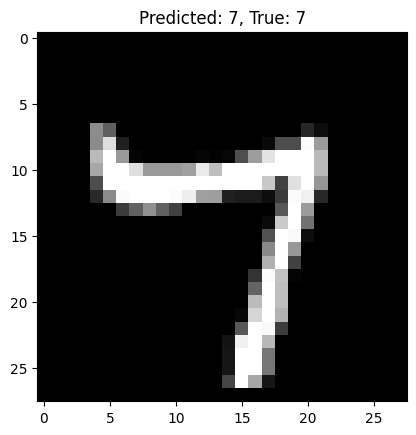

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Pick random index
i = np.random.randint(0, len(test_images))

# Run prediction
pred = model.predict(test_images[i:i+1])
predicted_label = np.argmax(pred)

plt.imshow(test_images[i].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_label}, True: {test_labels[i]}")
plt.show()


In [6]:
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(test_images)
pred_labels = np.argmax(preds, axis=1)

print(classification_report(test_labels, pred_labels))
print(confusion_matrix(test_labels, pred_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   2    1 1020    0    1    0    0    8    0    0]
 [   0    0    0 1004    0    4    0    0